In [25]:
import numpy as np
import tensorflow as tf
from curriculum_learning.models.classifier_model import ClassifierModel
from curriculum_learning import utils
import yaml
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
with open("models_hyperparameters.yaml", "r") as stream:
    models_hyperparameters = yaml.safe_load(stream)
    
with open("config_tests.yaml", "r") as stream:
    config_tests = yaml.safe_load(stream)
    
N_EPOCHS = 50
N_TRIALS = 30
BATCH_SIZE = 512

CONFIG = config_tests["proba_best"]

loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [51]:
ds0, ds_info = tfds.load('eurosat', split='train', with_info=True)

In [52]:
xx = 0
vals = {}
import re


for el in ds0.shuffle(buffer_size=1000):
    st = el['filename'].numpy().decode("utf-8")
    class_name = st.split("_")[0]
    class_name = re.findall('[A-Z][^A-Z]*', class_name)
    class_name = "\n".join(class_name)
    if "\n" not in class_name:
        class_name += "\n"
    # class_name = el["label"].numpy()
    
    
    if class_name not in vals:
        vals[class_name] = []
    
    vals[class_name].append(el['image'].numpy())
    
    xx += 1
    if xx >= 2000:
        break

2024-06-17 19:20:32.796369: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


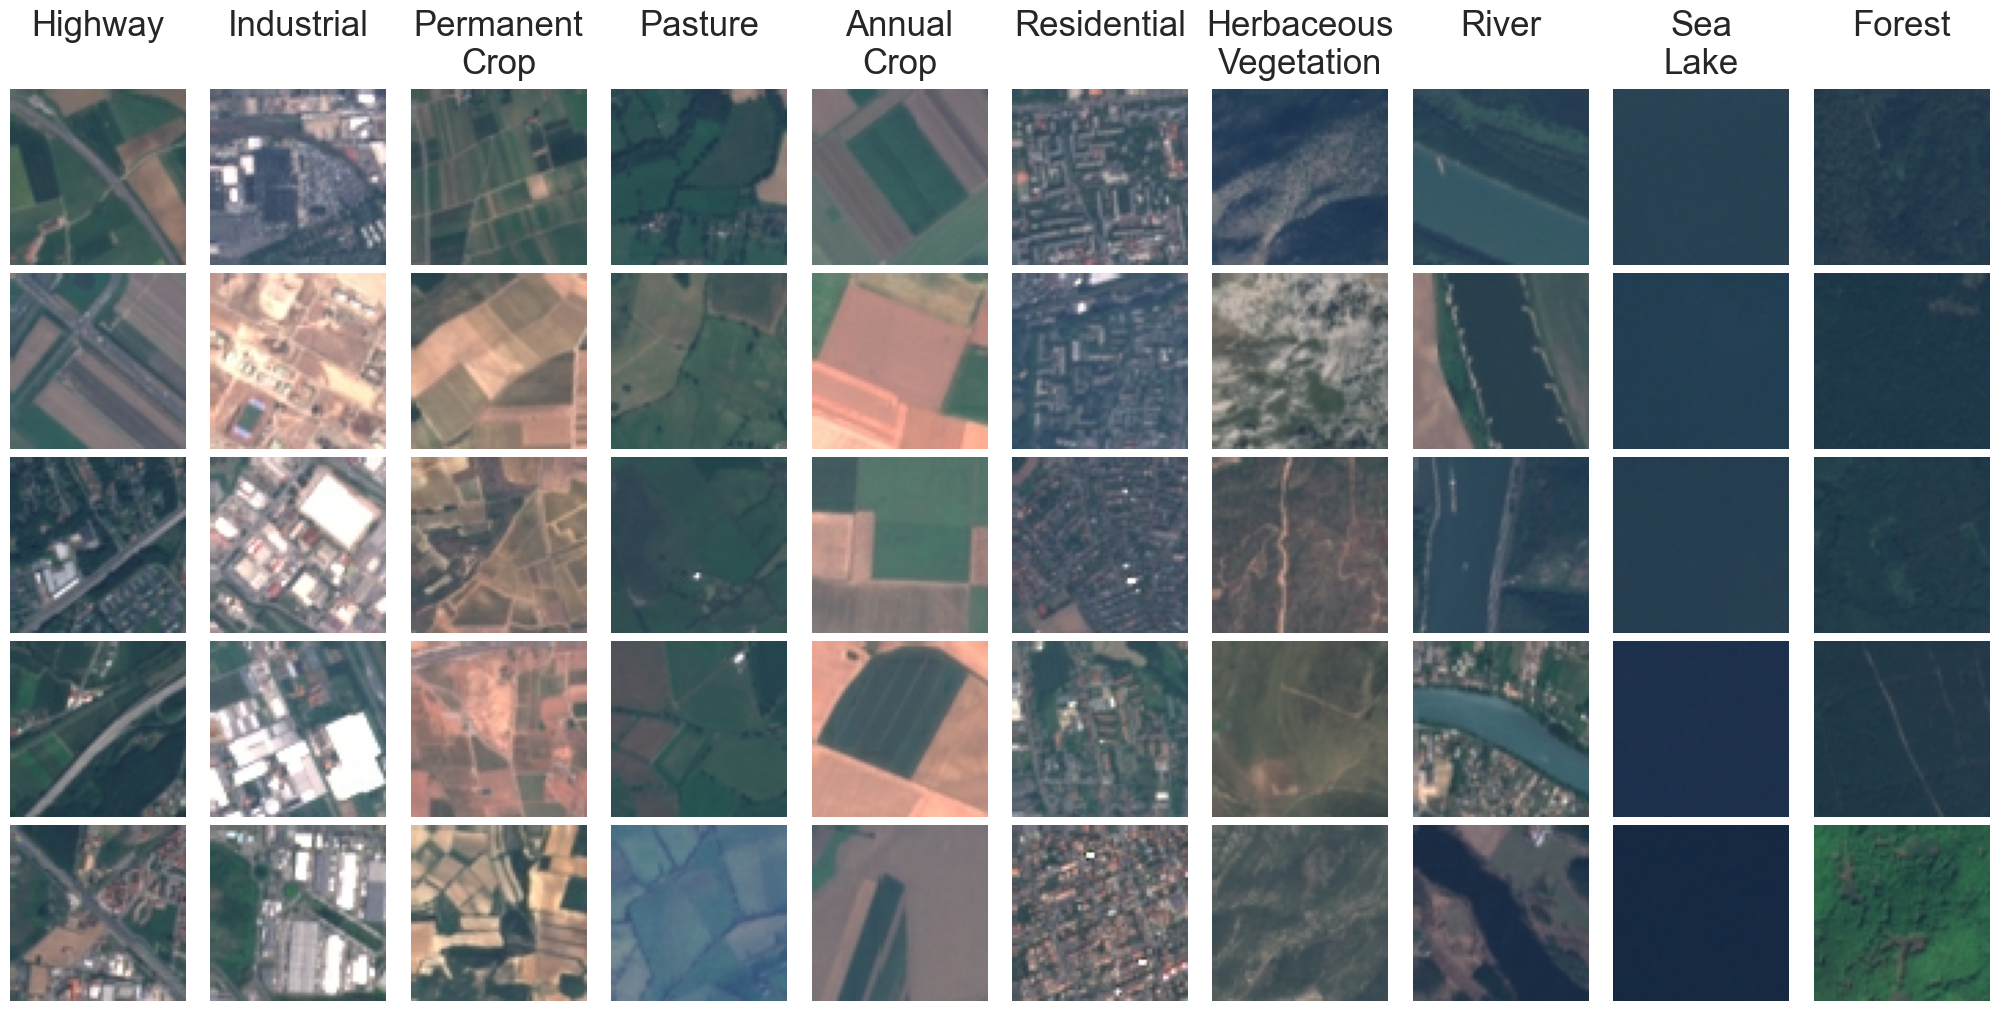

In [55]:
fig = plt.figure(figsize=(20, 10), constrained_layout=True)


# create 3x1 subfigs
subfigs = fig.subfigures(nrows=1, ncols=10)

for row, subfig in enumerate(subfigs):
    class_name = list(vals.keys())[row]
    # class_name2 = ["Aircraft", "Bird", "Car", "Cat", "Deer", "Dog", "Horse", "Monkey", "Ship",
    #               "Truck"][class_name]
    
    subfig.suptitle(f'{class_name}', fontsize=25)

    axs = subfig.subplots(nrows=5, ncols=1)

    for col, ax in enumerate(axs):
        ax.imshow(vals[class_name][col])
        ax.axis("off")

plt.savefig("eurosat.png")